In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget
%pdb off

from pyCascade import probePost, physics, utils
from pyCascade.probeReadWrite import read_probes_file_switch
from matplotlib import pyplot as plt
from matplotlib import cm, colors
import numpy as np
import scipy as sp
import os
from IPython.core.debugger import set_trace
import pandas as pd
import seaborn as sns
from fnmatch import fnmatch
from cycler import cycler
import plotly.express as px
import plotly

plt.rcParams['figure.dpi'] = 140
im_scaling = .75
plt.rcParams['figure.figsize'] = [6.4 * im_scaling, 4.8 * im_scaling]

category =  "config2"

############ Universal ################
scratch_home = os.getenv('SCRATCH') #need to set SCRATCH (even if there is no real SCRATCH) to the location where results are written
scratch_dir = f'{scratch_home}/Cascade/city_block_cfd'
home_dir = !pwd
home_dir = home_dir[0]

display(scratch_dir)
display(home_dir)
plt.close('all')

Automatic pdb calling has been turned OFF


'/scratch/users/nbachand/Cascade/city_block_cfd'

'/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd'

In [2]:
hm = 6
window_dim = hm/2/4
velTenMeters = 4

velocity_scaling = 1/velTenMeters
ventilation_scaling = velocity_scaling/(window_dim**2)

@utils.no_kwargs
@utils.dict_apply
def norm_vel(df):
    return df * velocity_scaling

@utils.no_kwargs
@utils.dict_apply
def norm_vent(df):
    return df * ventilation_scaling

@utils.no_kwargs
@utils.dict_apply
def abs_values(df):
    return df.abs()

@utils.no_kwargs
@utils.dict_apply
def flip_data(df):
    return -df


In [3]:
run = 46
probes_dir = f'{scratch_dir}/CHARLES/{category}/R{run}/probes/probesOut'
oak_probes_dir =  f'{home_dir}/CHARLES/{category}/R{run}/probes/probesOut_parquet/'

In [4]:
start = 40000# 30000
stop = -1
by = 1

In [5]:
# probes = probePost.Probes(probes_dir, directory_parquet=oak_probes_dir, file_type = "csv")
# probes.to_parquet(overwrite=True)

probes = probePost.Probes(probes_dir, directory_parquet = oak_probes_dir, file_type = "parquet")


In [6]:
nameKey = read_probes_file_switch(f"{probes_dir}/../locations/nameKey_extraProbe.txt")
nameKey = nameKey.compute()

extraProbe = nameKey.copy()
extraProbe = pd.concat([extraProbe, probes.

locations["extraProbe"]], axis = "columns")
df = probes.statistics(
    names = [name for name in  probes.probe_names if "extraProbe" in name], 
    steps = [probes.probe_steps[stop]],
    quants = ["comp(u_avg,0)", "comp(u_avg,1)", "comp(u_avg,2)"],
    parrallel=False
    )
extraProbe = pd.concat([extraProbe, df], axis = "columns")
extraProbe.set_index(0, inplace=True)
extraProbe = extraProbe.rename(columns=lambda x: f"EP_{x}")
extraProbe = extraProbe.rename(index=lambda x: x.replace("extraProbe_", ''))
display(extraProbe)

# del probes

processing data took 4 seconds


EP_x  EP_y    EP_z  EP_comp(u_avg,0)  \
0                                                              
roof_sl                44.00  12.0   60.00          0.903852   
xwindow_0-0_sl         36.55   1.5   58.00          0.081421   
zwindow_0-0_sl         40.00   1.5   54.55          0.623834   
xwindow_0-1_sl         36.55   1.5   62.00         -0.146850   
zwindow_0-1_sl         40.00   1.5   65.45          0.327162   
...                      ...   ...     ...               ...   
zwindow_0-1_h_0-2_Bxz -56.00   1.5 -113.45          0.653699   
zwindow_1-0_h_0-2_Bxz -60.00   1.5 -102.55         -0.013746   
zwindow_1-1_h_0-2_Bxz -60.00   1.5 -113.45          0.734194   
zwindow_2-0_h_0-2_Bxz -64.00   1.5 -102.55         -0.092491   
zwindow_2-1_h_0-2_Bxz -64.00   1.5 -113.45          0.492971   

                       EP_comp(u_avg,1)  EP_comp(u_avg,2)  
0                                                          
roof_sl                        0.045342          1.077090  
xwindow_0-0_sl                -0.152485          0.870609  
zwindow_0-0_sl                -0.048749          0.131952  
xwindow_0-1_sl                -0.259822          0.850690  
zwindow_0-1_sl                -0.273910          0.017727  
...                                 ...               ...  
zwindow_0-1_h_0-2_Bxz         -0.108030         -0.087738  
zwindow_1-0_h_0-2_Bxz          0.080574         -0.230858  
zwindow_1-1_h_0-2_Bxz         -0.125748         -0.000052  
zwindow_2-0_h_0-2_Bxz          0.022202          0.262868  
zwindow_2-1_h_0-2_Bxz          0.051811          0.501732  

[240 rows x 6 columns]

In [7]:
qoisOutputed = [
    "mass_flux",
    "mass_flux(p)",
    "mass_flux(T)",
    "mass_flux(D)",
    "mass_flux(S)",
    "sn_prod(u)",
    "sn_prod(p)",
    "sn_prod(abs(u))",
    "sn_prod(u**2)"
]
qois= ["mass_flux"]

# probes = probePost.Probes(probes_dir, directory_parquet = oak_probes_dir, probe_type = "FLUX_PROBES", flux_quants = qoisOutputed, file_type="csv")
# probes.to_parquet(overwrite = True)

probes = probePost.Probes(probes_dir, directory_parquet = oak_probes_dir, probe_type = "FLUX_PROBES", flux_quants = qoisOutputed, file_type = "parquet")



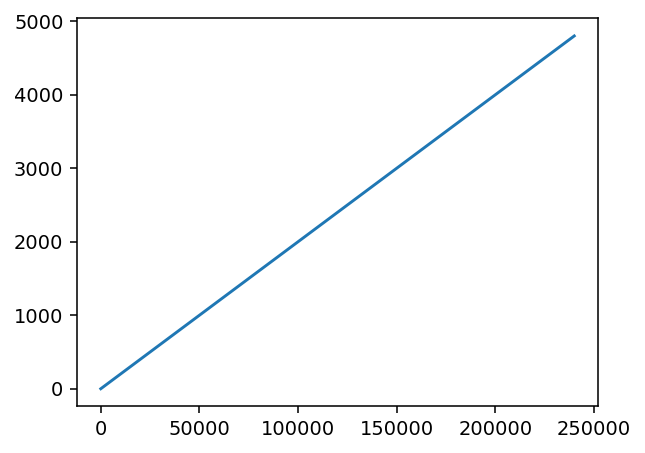

In [8]:
plt.figure()
plt.plot(probes.probe_steps, probes.probe_times)
plt.show()

In [9]:
# plt.figure()
# foo_mass = probes.data[("xwindow_0-0_h_3-0_Bx", qoisOutputed[0])].compute()
# foo_u = probes.data[("xwindow_0-0_h_3-0_Bx", qoisOutputed[1])].compute()
# foo_area = probes.areas["xwindow_0-0_h_3-0_Bx"]
# plt.plot(foo_mass.values/foo_u.values)
# plt.ylim(0,1.225*2)


In [10]:
# plt.figure()
# N = len(foo_mass)
# f, E = sp.signal.welch(foo_mass.values, fs = probes.dt, axis = 0, nperseg = N//4, scaling = 'density', detrend = 'constant') 
# plt.loglog(f, E)

## X Flow


processing data took 15 seconds


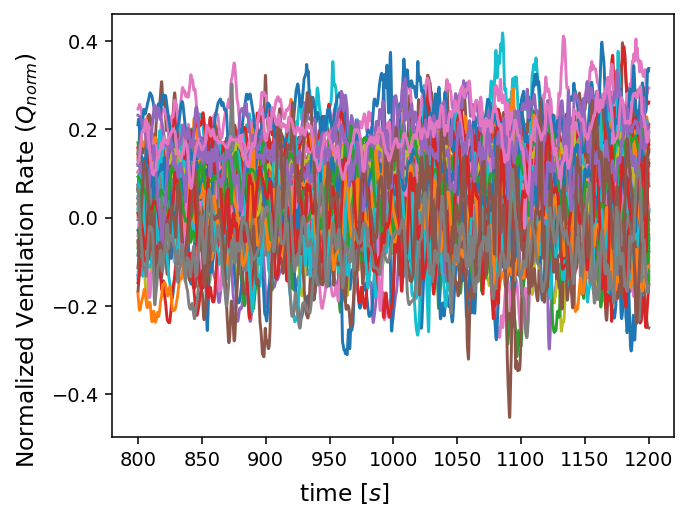

In [11]:
@utils.no_kwargs
def norm_norm_blocks(data_dict):
    if category == "config2":
        return probePost.mul_names(data_dict, [name for name in probes.probe_names if "Bxz" in name or "Bz" in name], -1)
    return data_dict

(fig, ax) = probes.time_plots(
    names = [name for name in  probes.probe_names if "xwindow_" in name], 
    steps = probes.probe_steps[start:60000:by],
    quants = qois,
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
        'xlabel' : 'time $[s]$',
        'horizontal spacing' : probes.probe_times,
        },
    processing = [norm_vent, norm_norm_blocks],
    parrallel=True
    )


In [20]:
df = probes.statistics(
    names = [name for name in  probes.probe_names if "xwindow" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = qois,
    processing = [norm_vent, norm_norm_blocks],
    parrallel=False
    )

x_mean = probePost.time_average(df)
x_rms = probePost.time_rms(df)
x_net = probePost.time_average(abs(df))

x_flowStats = pd.concat([x_mean, x_rms, x_net], axis = "columns")
x_flowStats.columns = ["mean", "rms", "net"]

processing data took 9 seconds


In [13]:
# plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/xwindows', bbox = "tight")

# x_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xmean.csv')
# x_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xrms.csv')
# x_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xnet.csv')

## Z Flow


In [14]:
@utils.no_kwargs
def norm_norm_windows(data_dict):
    return probePost.mul_names(data_dict, [name for name in probes.probe_names if fnmatch(name, "*window_?-1*")], -1)

@utils.no_kwargs
def norm_norm_blocks(data_dict):
    if category == "config2":
        return probePost.mul_names(data_dict, [name for name in probes.probe_names if "Bxz" in name or "Bx" in name], -1)
    return data_dict

# (fig, ax) = probes.time_plots(
#     names = [name for name in  probes.probe_names if "zwindow" in name], 
#     steps = probes.probe_steps[start:stop:by],
#     quants = qois,
#     plot_params = {
#         'stack span' : 'y',
#         'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
#         'xlabel' : 'time $[s]$',
#         'horizontal spacing' : probes.probe_times,
#         },
#     processing = [norm_vent, norm_norm_windows, norm_norm_blocks],
#     parrallel=True
#     )

df = probes.statistics(
    names = [name for name in  probes.probe_names if "zwindow" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = qois,
    processing = [norm_vent, norm_norm_blocks],
    parrallel=False
    )

z_mean = probePost.time_average(df)
z_rms = probePost.time_rms(df)
z_net = probePost.time_average(abs(df))

z_flowStats = pd.concat([z_mean, z_rms, z_net], axis = "columns")
z_flowStats.columns = ["mean", "rms", "net"]

processing data took 43 seconds


In [15]:
# plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/zwindows', bbox_inches = "tight")

# z_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/zmean.csv')
# z_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/zrms.csv')
# z_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/znet.csv')

## Y Flow


In [21]:
# (fig, ax) = probes.time_plots(
#     names = [name for name in  probes.probe_names if "skylight" in name], 
#     steps = probes.probe_steps[start:stop:by],
#     quants = qois,
#     plot_params = {
#         'stack span' : 'y',
#         'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
#         'xlabel' : 'time $[s]$',
#         'horizontal spacing' : probes.probe_times,
#         },
#     processing = [norm_vent, norm_norm_skylights],
#     parrallel=True
#     )

df = probes.statistics(
    names = [name for name in  probes.probe_names if "skylight" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = qois,
    processing = [norm_vent, norm_norm_blocks],
    parrallel=False
    )

y_mean = probePost.time_average(df)
y_rms = probePost.time_rms(df)
y_net = probePost.time_average(abs(df))

y_flowStats = pd.concat([y_mean, y_rms, y_net], axis = "columns")
y_flowStats.columns = ["mean", "rms", "net"]

processing data took 4 seconds


In [17]:
# plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/ywindows')

# y_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/ymean.csv')
# y_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/yrms.csv')
# y_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/ynet.csv')

## All Flow

In [22]:
def matchNewNamingConvention(input_str):
    # Find the position of the '-' in the string
    split_index = input_str.find('_h_')

    if split_index == -1:
        return input_str #return original if no house number
    
    n1 = int(input_str[split_index+3])
    n2 = int(input_str[split_index+5])
    
    # Modify the numbers
    new_n1 = n1 - 3
    new_n2 = n2 - 2
    
    # Format the output string with the modified numbers
    output_str = f"{new_n1}-{new_n2}"
    
    return f"{input_str[:split_index+3]}{output_str}{input_str[split_index+6:]}"



In [29]:
flowStats = pd.concat([x_flowStats, y_flowStats, z_flowStats], axis = "index")
locations = probes.get_avg_locations()
locations = locations.loc[flowStats.index.values]
areas = {k: v for k, v in probes.areas.items() if k in flowStats.index}
if category == "config2" and run < 40:
    flowStats = flowStats.rename(index=lambda x: matchNewNamingConvention(x))
    locations = locations.rename(index=lambda x: matchNewNamingConvention(x))
    areas = pd.Series(areas).rename(index=lambda x: matchNewNamingConvention(x))
flowStats = probePost.addWindowDetails(flowStats, locations, areas, extraProbe)



In [30]:

roomQois = ["mean", "net", "EP_normal", "EP_shear", "EPR_mag"]

connectedWindows = {
    "corner": [
        "xwindow_0-0",
        "zwindow_0-0",
        "skylight_0-0"
    ],
    "single": [
        "zwindow_1-0",
        "skylight_1-0"
    ],
    "dual": [
        "xwindow_0-1",
        "zwindow_0-1",
        "zwindow_1-1",
        "skylight_0-1",
        "skylight_1-1"
       ],
    "cross": [
        "zwindow_2-0",
        "zwindow_2-1",
        "skylight_2-0",
        "skylight_2-1"
    ]
}
sort_order = ["blockType", "houseType", "roomType"]
roomVentilation = probePost.roomStatistics(flowStats, connectedWindows, roomQois)
roomVentilation = roomVentilation.sort_values(by = sort_order)
sort_order.append("windowType")
flowStats = flowStats.sort_values(by = sort_order)

roomVentilation["nWindows"] = roomVentilation["mean"].apply(lambda l: len(l))
roomVentilation["contResid"] = roomVentilation["mean"].apply(lambda l: sum(l))
for qoi in ["mean", "net"]:
    roomVentilation[qoi] = roomVentilation[qoi].apply(lambda l : sum(np.abs(l))/2)
roomVentilation["EPR_mag"] = roomVentilation["EPR_mag"].apply(lambda l: np.mean(l))
roomVentilation["EP_shear"] = roomVentilation["EP_shear"].apply(lambda l: sum(l))
roomVentilation["EP_normal_mag"] = roomVentilation["EP_normal"].apply(lambda l: sum(np.abs(l)))
roomVentilation["EP_normal_sum"] = roomVentilation["EP_normal"].apply(lambda l: abs(sum(l)))
roomVentilation["EP_normal_ratio"] = roomVentilation["EP_normal_mag"] / (roomVentilation["EP_normal_mag"] + roomVentilation["EP_normal_sum"])
display(roomVentilation)
display(flowStats)

mean       net  \
corner_h_0--1_B  0.009413  0.061872   
cross_h_0--1_B   0.018823  0.049081   
dual_h_0--1_B    0.080519  0.090776   
single_h_0--1_B  0.000185  0.000250   
corner_h_0--2_B  0.139469  0.144107   
...                   ...       ...   
single_h_0-2_Bz  0.000221  0.000369   
corner_sl_Bz     0.153351  0.169427   
cross_sl_Bz      0.345970  0.359151   
dual_sl_Bz       0.314895  0.323507   
single_sl_Bz     0.050081  0.064472   

                                                         EP_normal  EP_shear  \
corner_h_0--1_B                 [0.091733571, 0.10439499789021357]  1.213501   
cross_h_0--1_B                    [0.1438817816013153, 0.14792939]  0.885894   
dual_h_0--1_B     [-0.13283556235256383, -0.055619998, 0.15964494]  0.981611   
single_h_0--1_B                              [0.09026790139433348]  0.581073   
corner_h_0--2_B                         [-0.011279368, 0.44324452]  1.248212   
...                                                            ...       ...   
single_h_0-2_Bz                              [0.13779893356005507]  0.770068   
corner_sl_Bz     [-0.10297943792545389, -0.0020239277520736317,...  2.866465   
cross_sl_Bz      [-0.11464832465428329, -0.015275104, 0.1572311...  4.410972   
dual_sl_Bz       [-0.122273891942937, -0.004475980844965506, 0....  4.477344   
single_sl_Bz           [-0.15624022280465097, 0.10741111125978203]  2.529700   

                  EPR_mag houseType blockType roomType           x         y  \
corner_h_0--1_B  1.272499      0--1         B   corner   47.015594  1.497615   
cross_h_0--1_B   1.272499      0--1         B    cross   55.999773  1.497595   
dual_h_0--1_B    1.272499      0--1         B     dual   48.675774  1.500022   
single_h_0--1_B  1.272499      0--1         B   single   51.998942  1.495154   
corner_h_0--2_B  1.595309      0--2         B   corner   55.016136  1.500000   
...                   ...       ...       ...      ...         ...       ...   
single_h_0-2_Bz  1.813229       0-2        Bz   single  104.023340  1.499420   
corner_sl_Bz     1.965108        sl        Bz   corner   57.358756  1.966833   
cross_sl_Bz      1.965108        sl        Bz    cross   59.999651  2.203340   
dual_sl_Bz       1.965108        sl        Bz     dual   62.769886  2.060568   
single_sl_Bz     1.965108        sl        Bz   single   57.039356  2.197882   

                         z  nWindows  contResid  EP_normal_mag  EP_normal_sum  \
corner_h_0--1_B  33.055550         2   0.000263       0.196129       0.196129   
cross_h_0--1_B   36.035253         2   0.037646       0.291811       0.291811   
dual_h_0--1_B    39.306152         3   0.076295       0.348101       0.028811   
single_h_0--1_B  32.111106         1  -0.000370       0.090268       0.090268   
corner_h_0--2_B   9.022450         2  -0.001835       0.454524       0.431965   
...                    ...       ...        ...            ...            ...   
single_h_0-2_Bz -59.997758         1   0.000443       0.137799       0.137799   
corner_sl_Bz    -39.331883         3  -0.067050       0.262295       0.052288   
cross_sl_Bz     -48.000003         4   0.415689       0.322610       0.008148   
dual_sl_Bz      -41.199981         5   0.160682       0.901588       0.648088   
single_sl_Bz    -44.000548         2   0.100161       0.263651       0.048829   

                 EP_normal_ratio  
corner_h_0--1_B         0.500000  
cross_h_0--1_B          0.500000  
dual_h_0--1_B           0.923561  
single_h_0--1_B         0.500000  
corner_h_0--2_B         0.512724  
...                          ...  
single_h_0-2_Bz         0.500000  
corner_sl_Bz            0.833786  
cross_sl_Bz             0.975365  
dual_sl_Bz              0.581791  
single_sl_Bz            0.843737  

[96 rows x 16 columns]

mean       rms       net    windowType openingType  \
xwindow_0-0_h_0--1  0.009544  0.078010  0.062084   xwindow_0-0     xwindow   
zwindow_0-0_h_0--1 -0.009281  0.077556  0.061659   zwindow_0-0     zwindow   
zwindow_2-0_h_0--1  0.018716  0.060750  0.049031   zwindow_2-0     zwindow   
zwindow_2-1_h_0--1  0.018930  0.060379  0.049131   zwindow_2-1     zwindow   
xwindow_0-1_h_0--1  0.038743  0.044458  0.047311   xwindow_0-1     xwindow   
...                      ...       ...       ...           ...         ...   
xwindow_0-1_sl_Bz   0.084769  0.064500  0.093211   xwindow_0-1     xwindow   
zwindow_0-1_sl_Bz  -0.152826  0.050929  0.153068   zwindow_0-1     zwindow   
zwindow_1-1_sl_Bz  -0.081728  0.059913  0.089128   zwindow_1-1     zwindow   
skylight_1-0_sl_Bz  0.050197  0.059016  0.064666  skylight_1-0    skylight   
zwindow_1-0_sl_Bz   0.049964  0.059348  0.064279   zwindow_1-0     zwindow   

                   windowNumber houseType blockType      area          x  ...  \
xwindow_0-0_h_0--1          0-0      0--1         B  0.562500  46.032316  ...   
zwindow_0-0_h_0--1          0-0      0--1         B  0.575481  47.998871  ...   
zwindow_2-0_h_0--1          2-0      0--1         B  0.575135  55.999546  ...   
zwindow_2-1_h_0--1          2-1      0--1         B  0.562500  56.000000  ...   
xwindow_0-1_h_0--1          0-1      0--1         B  0.563477  46.027321  ...   
...                         ...       ...       ...       ...        ...  ...   
xwindow_0-1_sl_Bz           0-1        sl        Bz  0.564852  61.999991  ...   
zwindow_0-1_sl_Bz           0-1        sl        Bz  0.563764  63.925112  ...   
zwindow_1-1_sl_Bz           1-1        sl        Bz  0.565068  63.924364  ...   
skylight_1-0_sl_Bz          1-0        sl        Bz  0.577597  58.007140  ...   
zwindow_1-0_sl_Bz           1-0        sl        Bz  0.563229  56.071573  ...   

                    EP_comp(u_avg,0)  EP_comp(u_avg,1)  EP_comp(u_avg,2)  \
xwindow_0-0_h_0--1          0.091734         -0.131531          0.671286   
zwindow_0-0_h_0--1          0.529348         -0.005633          0.104761   
zwindow_2-0_h_0--1          0.636233         -0.003374          0.144057   
zwindow_2-1_h_0--1          0.202959          0.145307         -0.147929   
xwindow_0-1_h_0--1         -0.132622         -0.178225          0.663874   
...                              ...               ...               ...   
xwindow_0-1_sl_Bz           0.674320          0.024947         -0.387361   
zwindow_0-1_sl_Bz          -0.219171          0.107950          0.294765   
zwindow_1-1_sl_Bz          -0.168558         -0.010203          0.240513   
skylight_1-0_sl_Bz          0.823604          0.157362          1.280321   
zwindow_1-0_sl_Bz           0.107737          0.011542          1.007135   

                      EP_mag  EP_vel_orientation  EP_normal  EP_shear  \
xwindow_0-0_h_0--1  0.690174           97.637994   0.091734  0.684051   
zwindow_0-0_h_0--1  0.539644          101.154280   0.104395  0.529450   
zwindow_2-0_h_0--1  0.652347          102.741943   0.143882  0.636282   
zwindow_2-1_h_0--1  0.290154          120.652525   0.147929  0.249612   
xwindow_0-1_h_0--1  0.700058           79.061838  -0.132836  0.687339   
...                      ...                 ...        ...       ...   
xwindow_0-1_sl_Bz   0.778061          119.855409   0.387329  0.674800   
zwindow_0-1_sl_Bz   0.382852          124.932306   0.219224  0.313873   
zwindow_1-1_sl_Bz   0.293875          124.934614   0.168285  0.240921   
skylight_1-0_sl_Bz  1.530460           84.140634  -0.156240  1.522465   
zwindow_1-0_sl_Bz   1.012946           96.086991   0.107411  1.007235   

                     EPR_mag  EPR_vel_orientation  roomType  
xwindow_0-0_h_0--1  1.272499            54.862338    corner  
zwindow_0-0_h_0--1  1.272499            54.862338    corner  
zwindow_2-0_h_0--1  1.272499            54.862338     cross  
zwindow_2-1_h_0--1  1.272499            54.862338     cross  
xwindow_0-1_h_

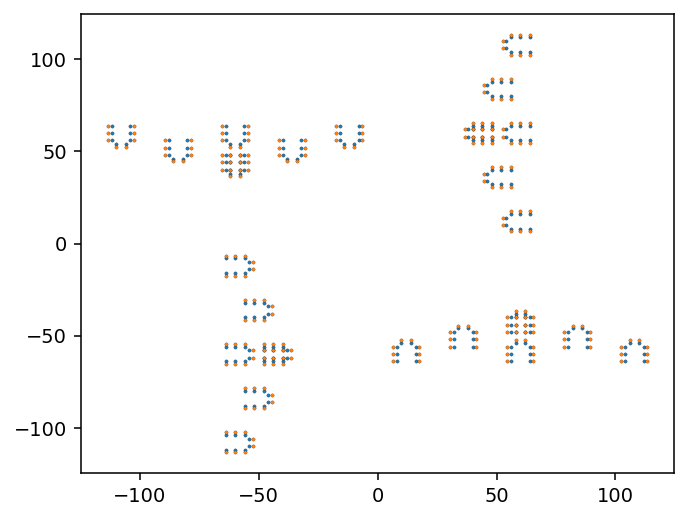

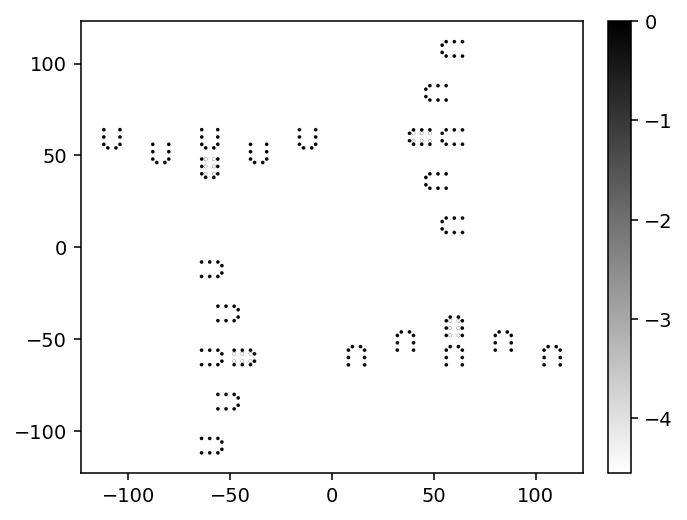

In [31]:
fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, edgecolors="black", linewidths=.1)
im=ax.scatter(flowStats['EP_x'], flowStats['EP_z'], s=4*im_scaling, edgecolors="black", linewidths=.1)


fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["y"] - flowStats["EP_y"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)


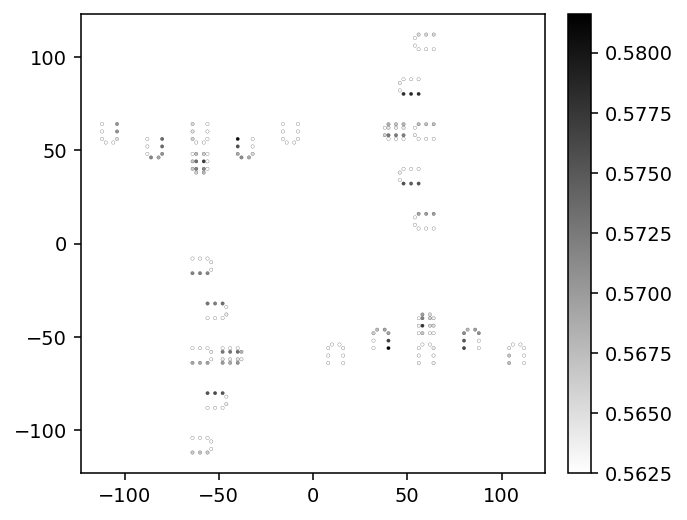

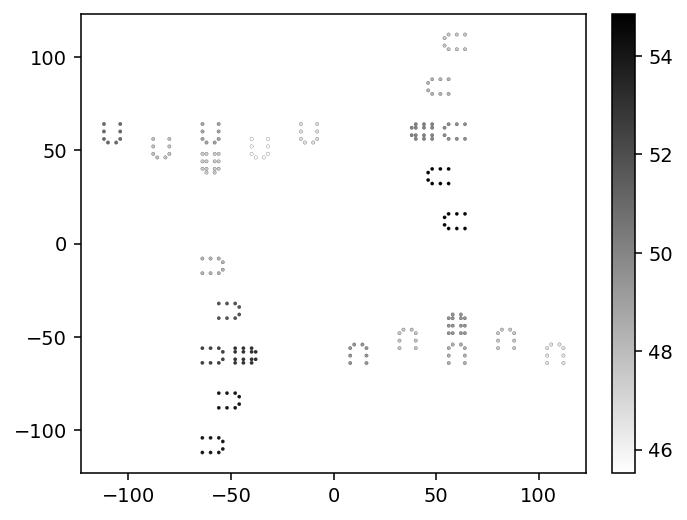

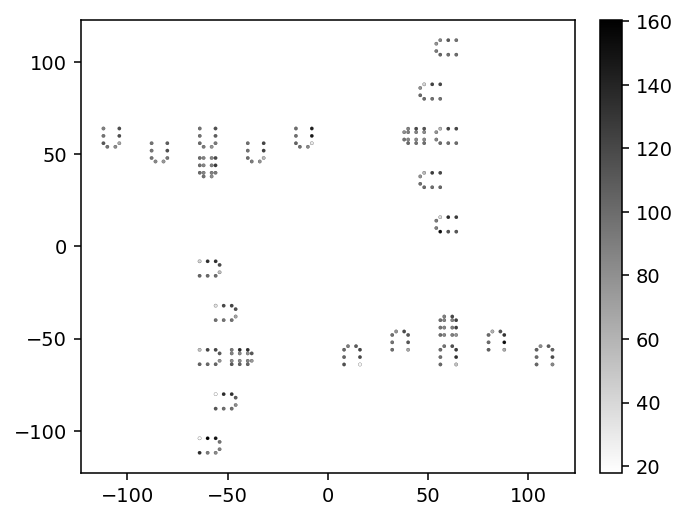

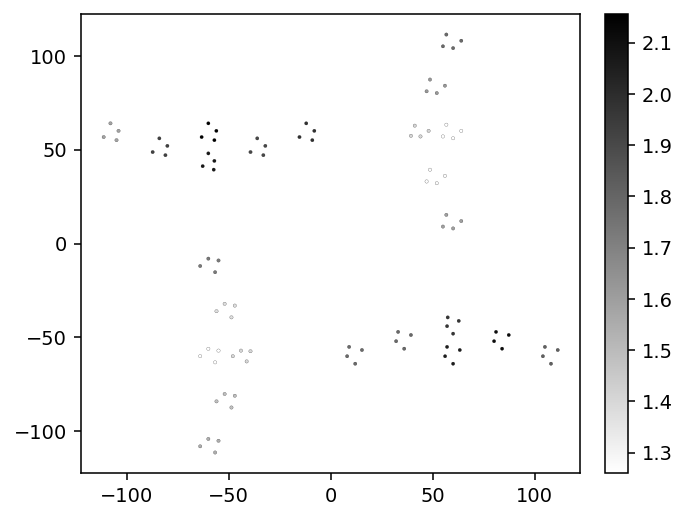

In [32]:

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["area"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/rmsInterior', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["EPR_vel_orientation"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/rmsInterior', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["EP_vel_orientation"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/rmsInterior', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=4*im_scaling, c=roomVentilation["EPR_mag"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanRooms', bbox_inches="tight")

In [33]:
fig = px.scatter(data_frame = flowStats, x = "EPR_mag", y = "mean", color = "roomType", symbol="roomType")
fig.update_xaxes(title_text='2H Wind Speed')
fig.update_yaxes(title_text='Normalized Ventilation Rate')
# fig.update_coloraxes(title_text='Local Wind Magnitude')
fig.show()
 
fig = px.scatter(data_frame = flowStats, x = "EP_normal", y = "mean", color = "EP_shear", symbol = "roomType")
fig.update_xaxes(title_text='Component of Wind Normal to Window')
fig.update_yaxes(title_text='Normalized Ventilation Rate')
# fig.update_coloraxes(title_text='Local Wind Magnitude')
fig.show()

In [34]:
fig = px.scatter(data_frame = roomVentilation, x = "EPR_mag", y = "mean", color = "roomType", symbol="roomType")
fig.update_xaxes(title_text='2H Wind Speed')
fig.update_yaxes(title_text='Normalized Ventilation Rate')
# fig.update_coloraxes(title_text='Local Wind Magnitude')
fig.show()
 
fig = px.scatter_3d(data_frame = roomVentilation, x = "EP_normal_mag", y = "EP_normal_sum",  z = "mean", color = "roomType", symbol = "roomType")
fig.update_xaxes(title_text='Magnitude/Sum of Window Normal Velocities')
fig.update_yaxes(title_text='Normalized Ventilation Rate')
# fig.update_coloraxes(title_text='Local Wind Magnitude')
fig.show()

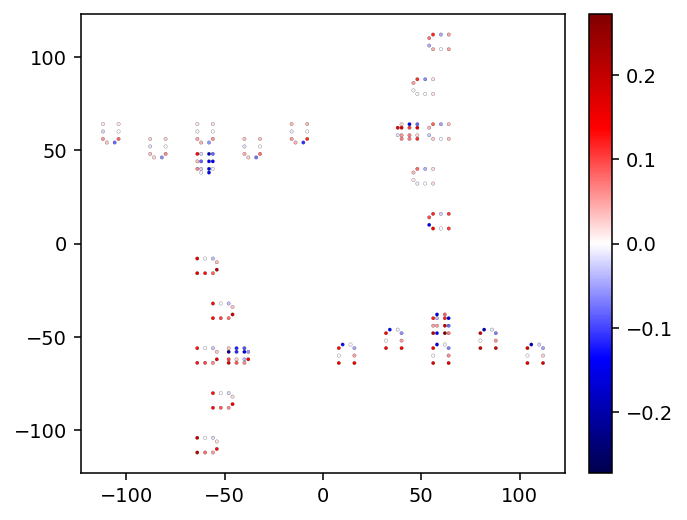

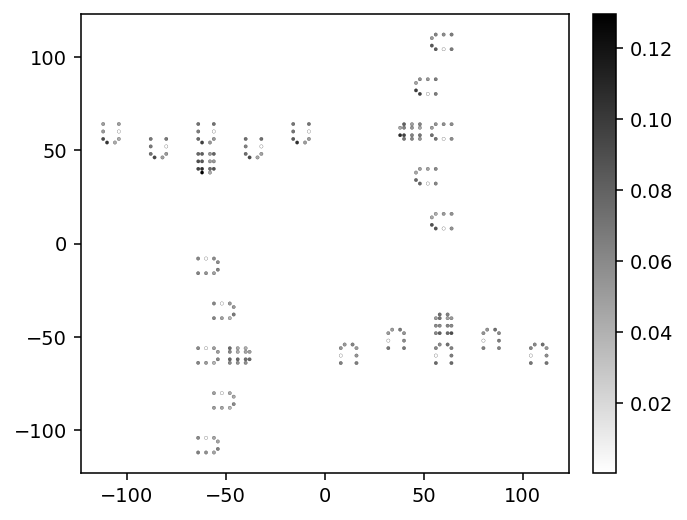

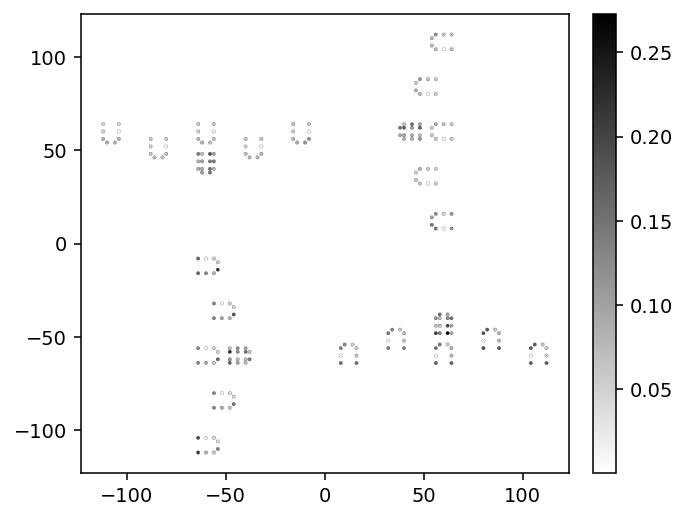

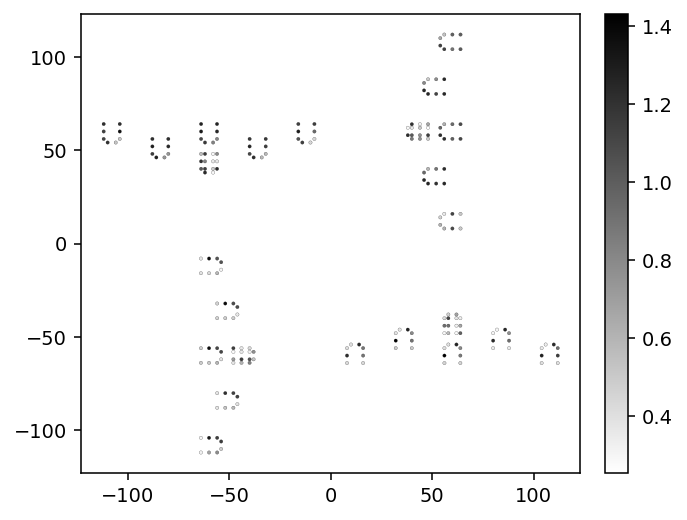

In [35]:
fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["mean"], cmap='seismic', edgecolors="black", linewidths=.1, norm=colors.CenteredNorm())
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanInterior', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["rms"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/rmsInterior', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["net"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/netInterior', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["rms"]/flowStats["net"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/rmsOnetInterior', bbox_inches="tight")

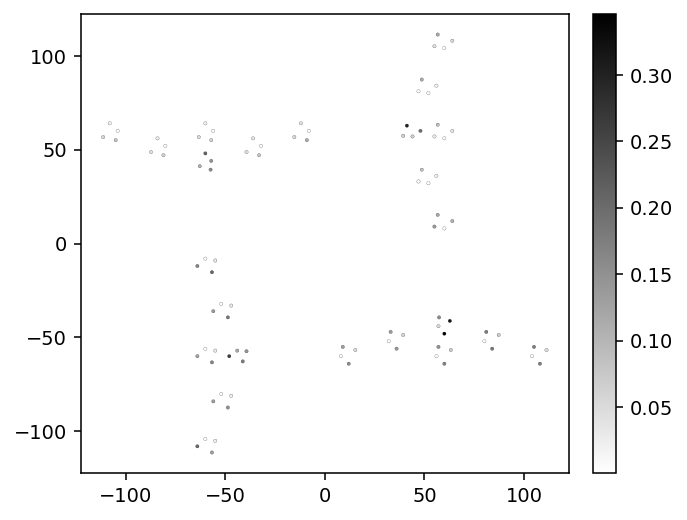

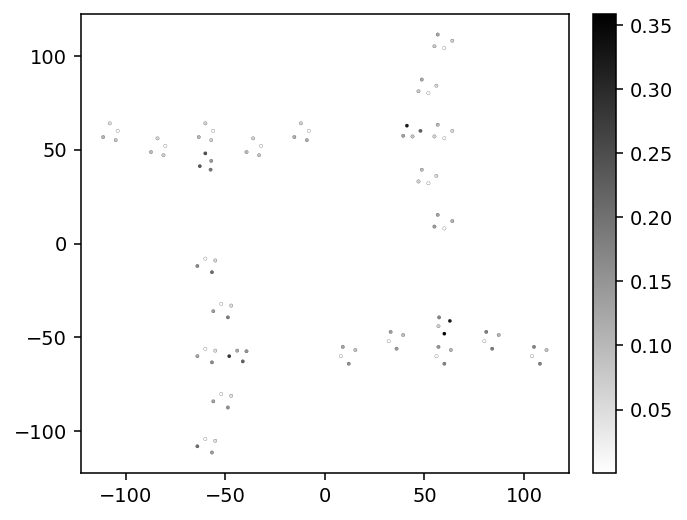

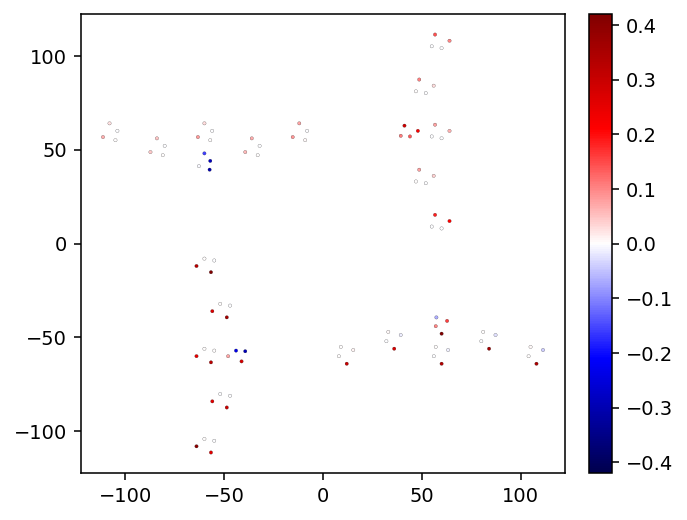

In [36]:
fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=4*im_scaling, c=roomVentilation["mean"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanRooms', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=4*im_scaling, c=roomVentilation["net"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/netRooms', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=4*im_scaling, c=roomVentilation["contResid"], cmap='seismic', edgecolors="black", linewidths=.1, norm = colors.CenteredNorm())
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/residRooms', bbox_inches="tight")

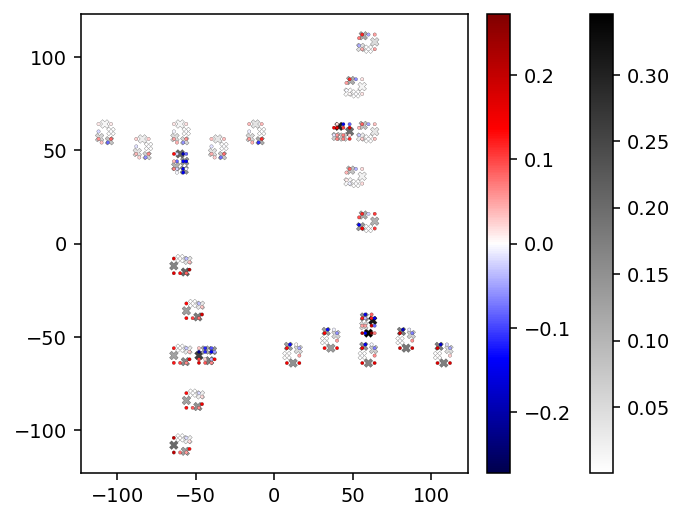

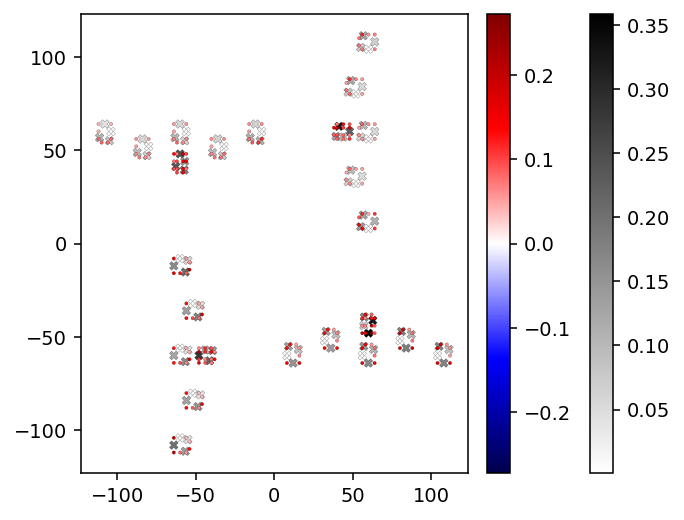

In [37]:
fig, ax=plt.subplots(1, 1, constrained_layout =True)
im1=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=20, c=roomVentilation["mean"], cmap='binary', edgecolors="black", linewidths=.1, marker = 'X')
im2=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["mean"], cmap='seismic', edgecolors="black", linewidths=.1, norm = colors.CenteredNorm())
fig.colorbar(im1)
fig.colorbar(im2)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanWindowsRooms', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im1=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=20, c=roomVentilation["net"], cmap='binary', edgecolors="black", linewidths=.1, marker = 'X')
im2=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["net"], cmap='seismic', edgecolors="black", linewidths=.1, norm = colors.CenteredNorm())
fig.colorbar(im1)
fig.colorbar(im2)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/netWindowsRooms', bbox_inches="tight")

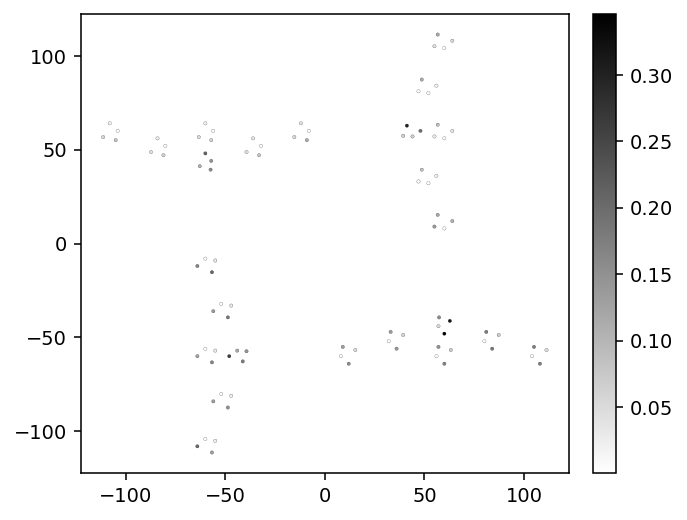

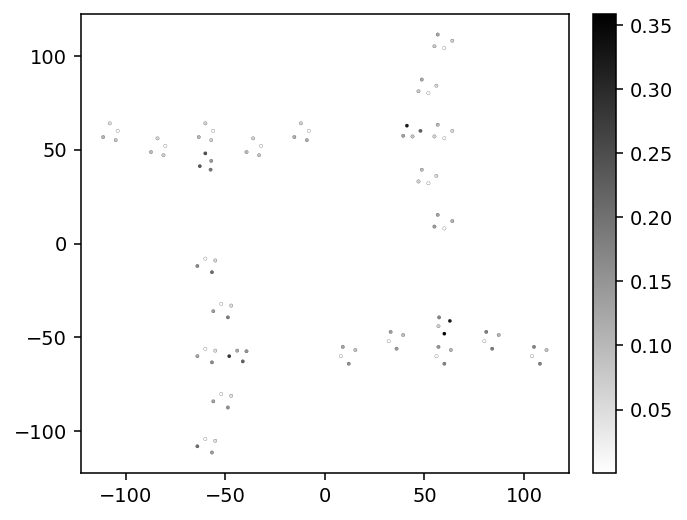

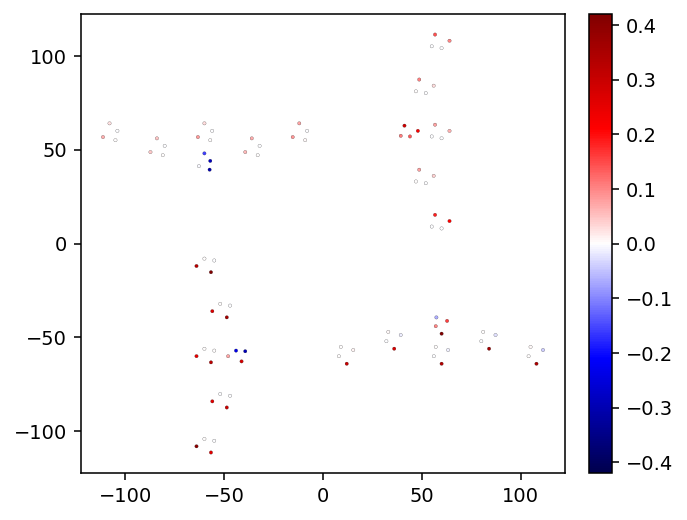

In [38]:
fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=4*im_scaling, c=roomVentilation["mean"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanRooms', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=4*im_scaling, c=roomVentilation["net"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/netRooms', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=4*im_scaling, c=roomVentilation["contResid"], cmap='seismic', edgecolors="black", linewidths=.1, norm = colors.CenteredNorm())
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/residRooms', bbox_inches="tight")

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning:

Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning:

Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning:

Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning:

33.

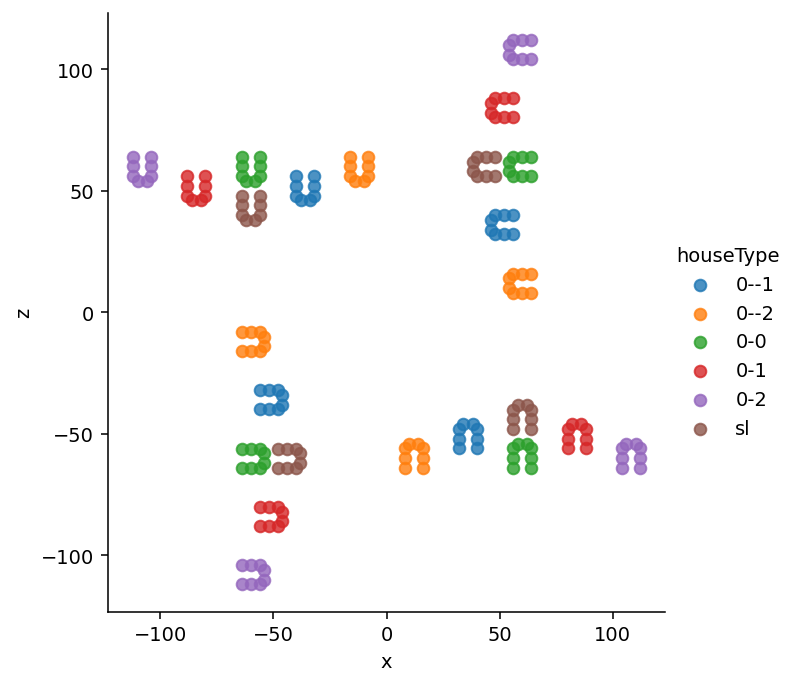

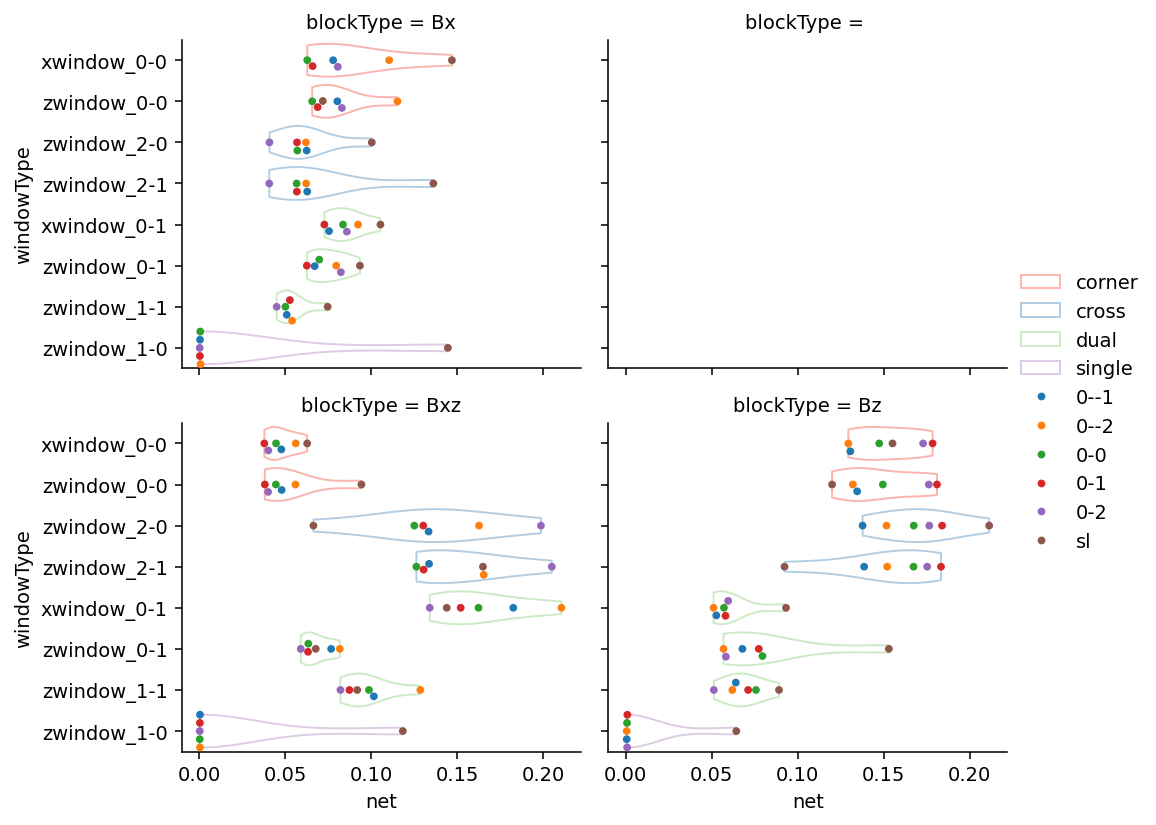

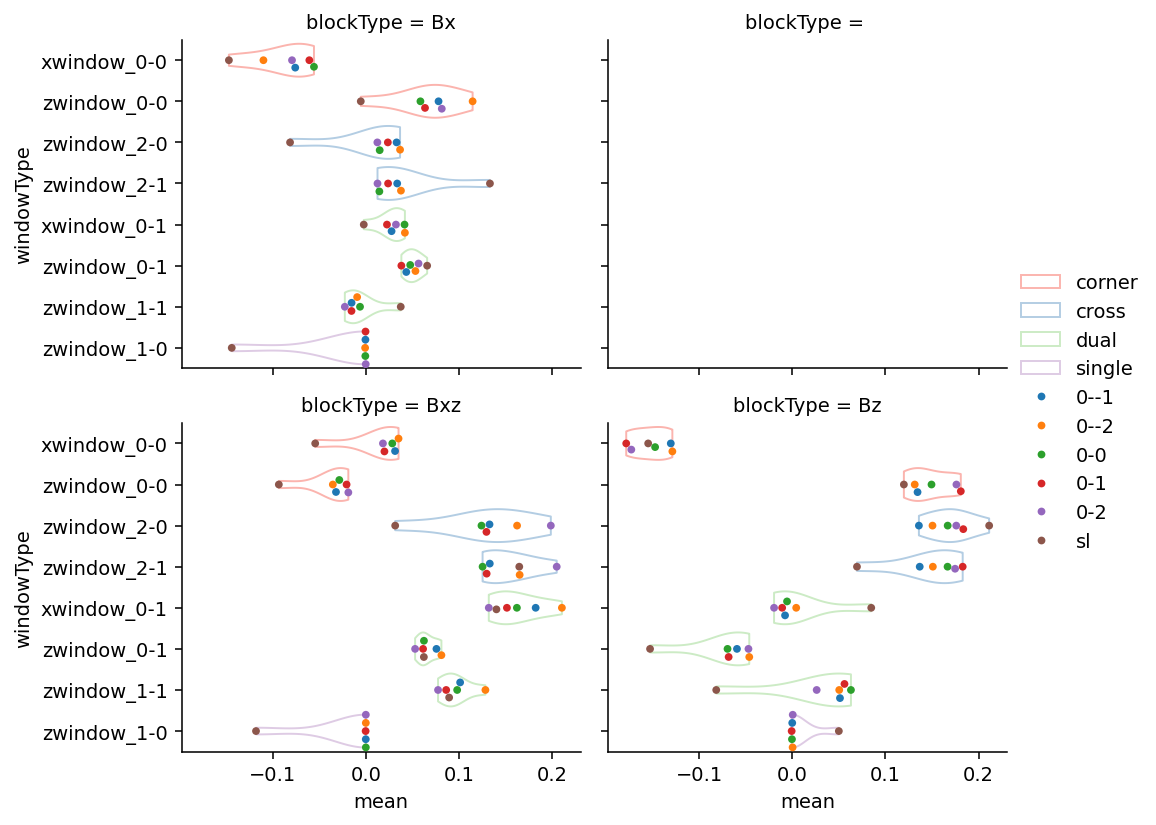

In [39]:
dfWindows = flowStats.loc[flowStats["openingType"].isin(["xwindow", "zwindow"])]

sns.lmplot(data = dfWindows, x = 'x', y = 'z', hue = 'houseType', fit_reg = False, palette = "tab10")
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/windowKeyLayout', bbox_inches="tight", dpi = 300)

g = sns.FacetGrid(dfWindows, col = "blockType", col_wrap = 2, col_order = ["Bx", '', "Bxz", "Bz"], aspect = 1.25, legend_out = True)
g.map(sns.violinplot, "net", "windowType", "roomType", inner = None, fill = False, palette = "Pastel1", linewidth = 1, density_norm = "width", cut = 0)
# g.map(sns.boxplot, "net", "windowType", color = "1", linewidth = 1, fliersize = 0)
g.map(sns.swarmplot, "net", "windowType", "houseType", palette = "tab10", size = 4)
g.add_legend()
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/netWindowViolins', bbox_inches="tight")

g = sns.FacetGrid(dfWindows, col = "blockType", col_wrap = 2, col_order = ["Bx", '', "Bxz", "Bz"], aspect = 1.25, legend_out = True)
g.map(sns.violinplot, "mean", "windowType", "roomType", inner = None, fill = False, palette = "Pastel1", linewidth = 1, density_norm = "width", cut = 0)
g.map(sns.swarmplot, "mean", "windowType", "houseType", palette = "tab10", size = 4)
g.add_legend()
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanWindowViolins', bbox_inches="tight")

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning:

Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning:

Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning:

Using the s

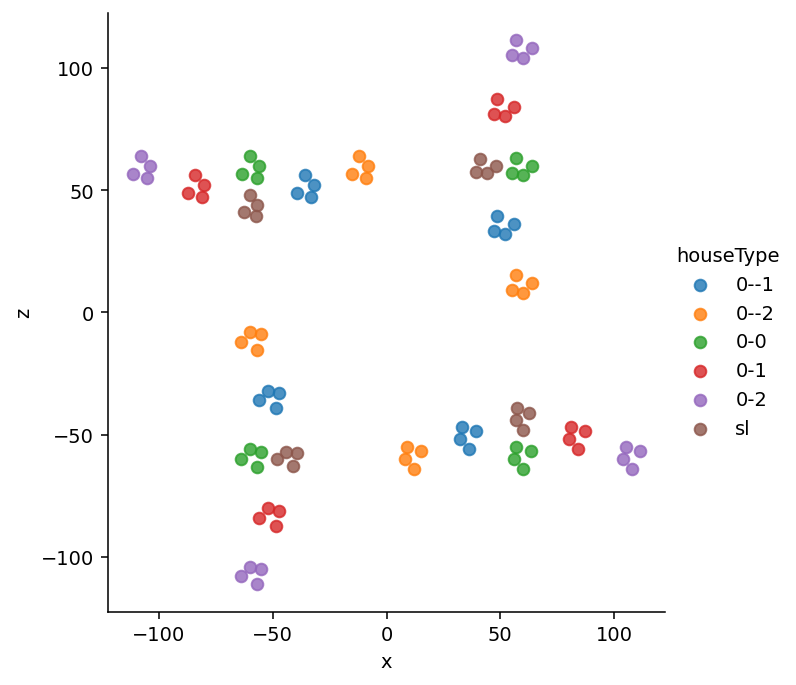

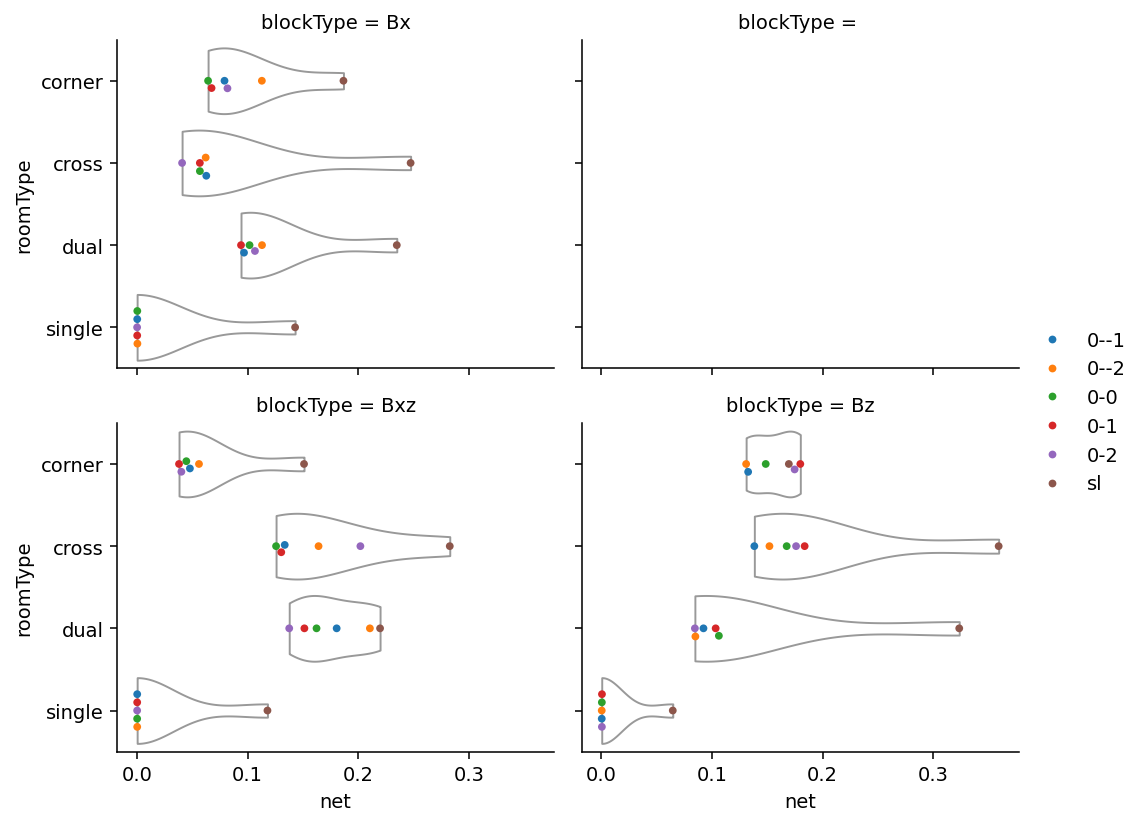

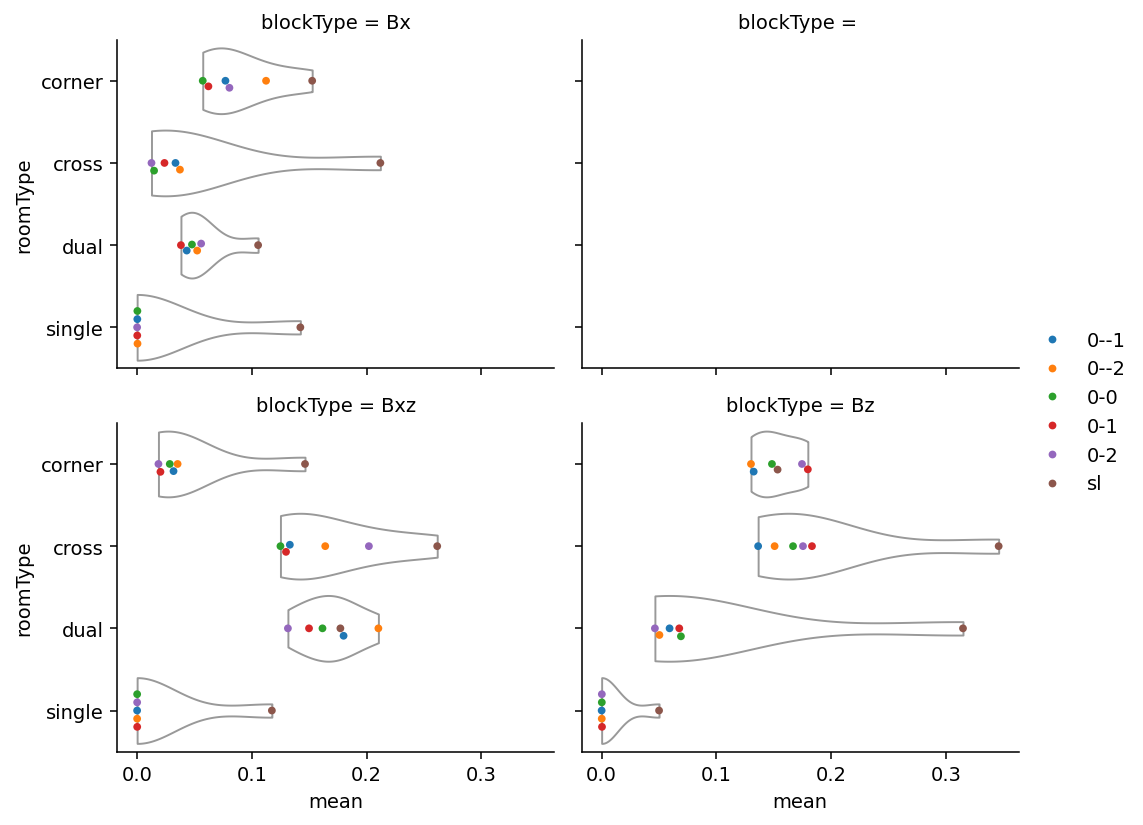

In [40]:
sns.lmplot(data = roomVentilation, x = 'x', y = 'z', hue = 'houseType', fit_reg = False, palette = "tab10")
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/roomKeyLayout', bbox_inches="tight", dpi = 300)

g = sns.FacetGrid(roomVentilation, col = "blockType", col_wrap = 2, col_order = ["Bx", '', "Bxz", "Bz"], aspect = 1.25, legend_out = True)
g.map(sns.violinplot, "net", "roomType", color = "1", inner = None, linewidth = 1, density_norm = "width", cut = 0)
# g.map(sns.boxplot, "net", "roomType", color = "1", linewidth = 1, fliersize = 0)
g.map(sns.swarmplot, "net", "roomType", "houseType", palette = "tab10", size = 4)
g.add_legend()
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/netRoomViolins', bbox_inches="tight")

g = sns.FacetGrid(roomVentilation, col = "blockType", col_wrap = 2, col_order = ["Bx", '', "Bxz", "Bz"], aspect = 1.25, legend_out = True)
g.map(sns.violinplot, "mean", "roomType", color = "1", inner = None, linewidth = 1, density_norm = "width", cut = 0)
g.map(sns.swarmplot, "mean", "roomType", "houseType", palette = "tab10", size = 4)
g.add_legend()
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanRoomViolins', bbox_inches="tight")

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning:

Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning:

Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning:

Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning:

Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.



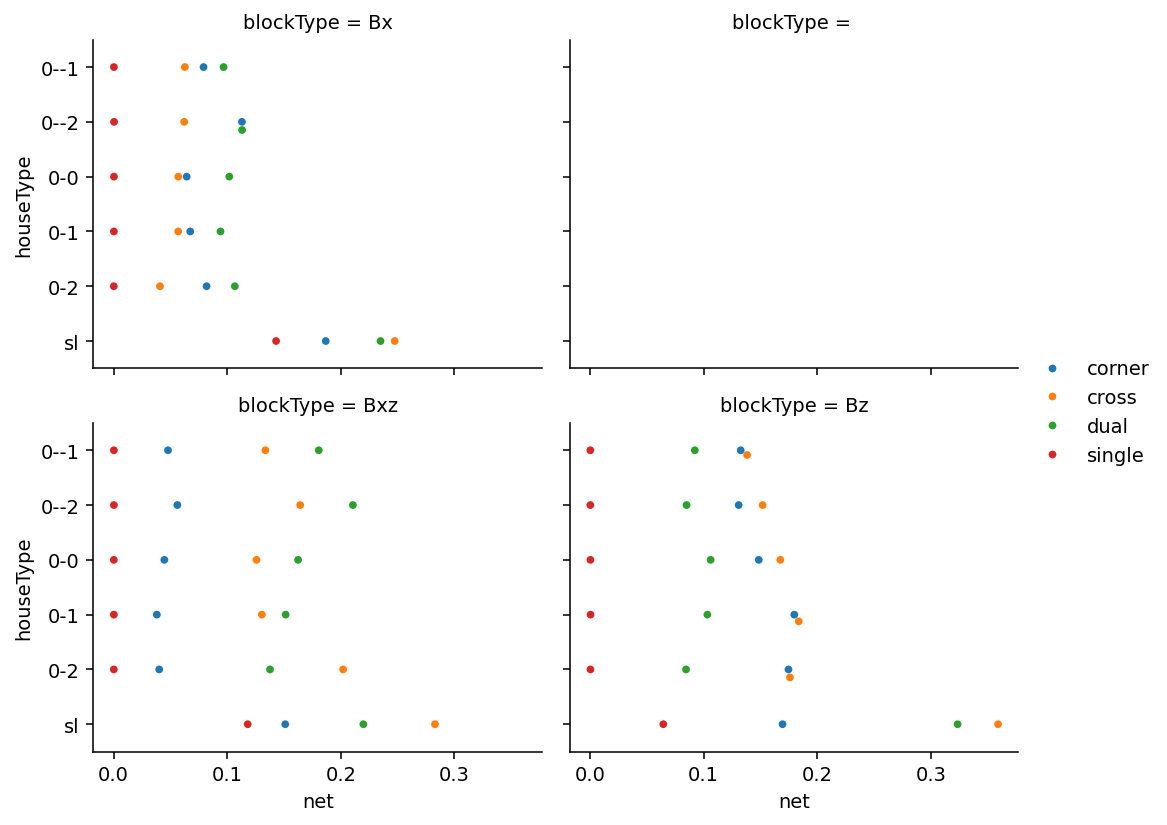

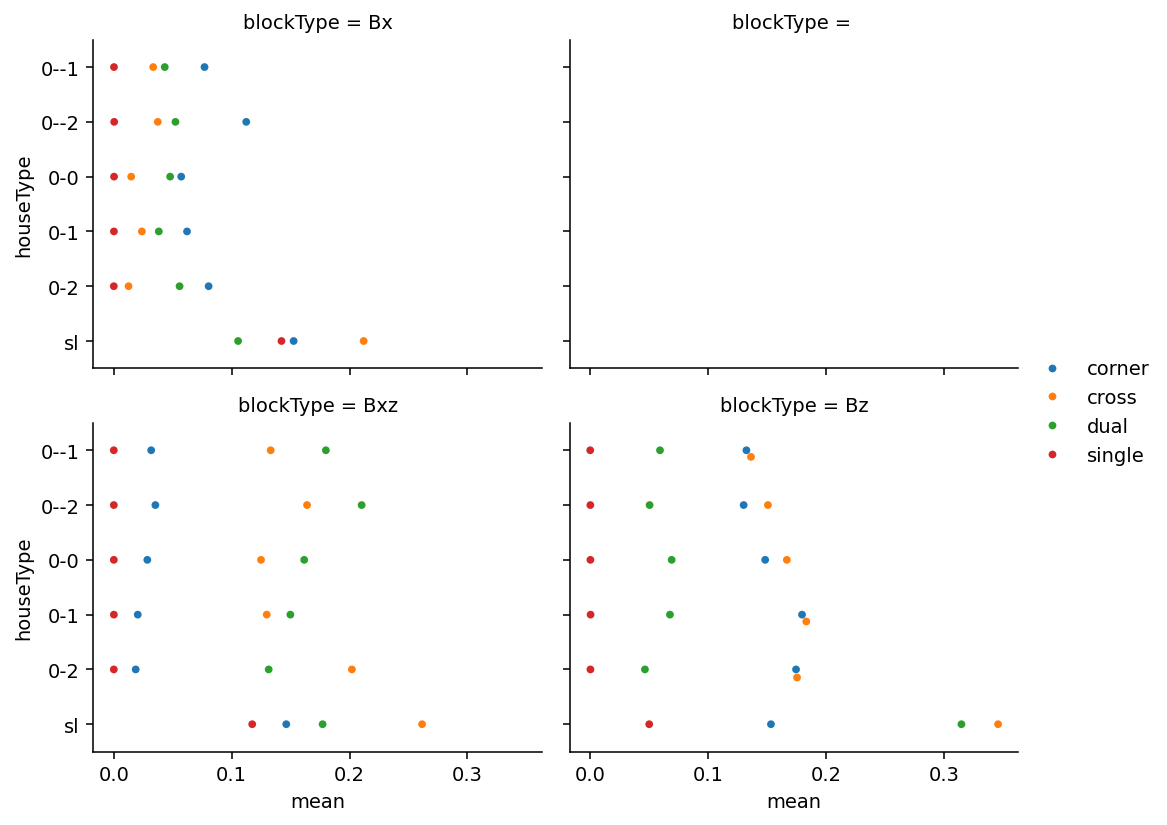

In [41]:
g = sns.FacetGrid(roomVentilation, col = "blockType", col_wrap = 2, col_order = ["Bx", '', "Bxz", "Bz"], aspect = 1.25, legend_out = True)
g.map(sns.swarmplot, "net", "houseType", "roomType", palette = "tab10", size = 4)
g.add_legend()
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/netHouseByRoom', bbox_inches="tight")

g = sns.FacetGrid(roomVentilation, col = "blockType", col_wrap = 2, col_order = ["Bx", '', "Bxz", "Bz"], aspect = 1.25, legend_out = True)
g.map(sns.swarmplot, "mean", "houseType", "roomType", palette = "tab10", size = 4)
g.add_legend()
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanHouseByRoom', bbox_inches="tight")